In [2]:
from BOVW import BOVW
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
import pickle, dill

In [3]:
path = "../../../dataset/train/"
path_val = "../../../dataset/valid/"
path_test = "../../../dataset/test/"

val_images_path = list(Path(path_val).rglob(f"*.jpg"))
test_images_path = list(Path(path_test).rglob(f"*.jpg"))

In [4]:
bovw = BOVW(num_cluster=150, step_size=15)

In [5]:
train_hist, labels, train_paths = bovw.create_train_Vocabulary(path, "jpg", "./bovw_withus")

Extracting SIFT from image ..\..\..\dataset\train\unsavory\5610.jpg...: 100%|██████████| 11220/11220 [04:57<00:00, 37.67it/s]


Visual words computed in: 7727.708763500001
BOVW computed in: 14.917420200000379
SVC fitted in: 3.642425500000172
KNN fitted in: 0.0037136000000828062
Random Forest fitted in: 2.3776505000005272


              precision    recall  f1-score   support

      savory       0.93      0.90      0.92      5610
    unsavory       0.91      0.94      0.92      5610

    accuracy                           0.92     11220
   macro avg       0.92      0.92      0.92     11220
weighted avg       0.92      0.92      0.92     11220



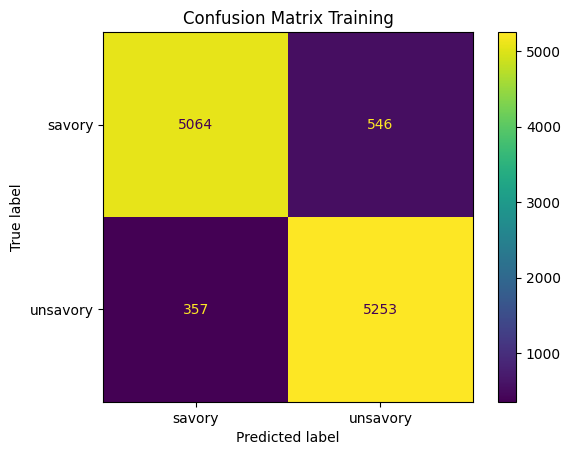

In [19]:
print(classification_report(labels, bovw.model.predict(train_hist)))

ConfusionMatrixDisplay.from_estimator(bovw.model, train_hist, labels)
plt.title("Confusion Matrix Training")
plt.show()

c:\Users\Alessandro\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


              precision    recall  f1-score   support

      savory       0.94      0.71      0.81      5610
    unsavory       0.77      0.95      0.85      5610

    accuracy                           0.83     11220
   macro avg       0.85      0.83      0.83     11220
weighted avg       0.85      0.83      0.83     11220



c:\Users\Alessandro\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


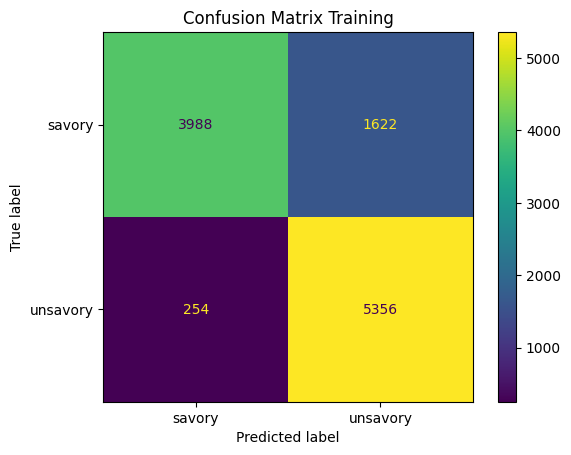

In [20]:
print(classification_report(labels, bovw.knn.predict(train_hist)))

ConfusionMatrixDisplay.from_estimator(bovw.knn, train_hist, labels)
plt.title("Confusion Matrix Training")
plt.show()

              precision    recall  f1-score   support

      savory       1.00      1.00      1.00      5610
    unsavory       1.00      1.00      1.00      5610

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



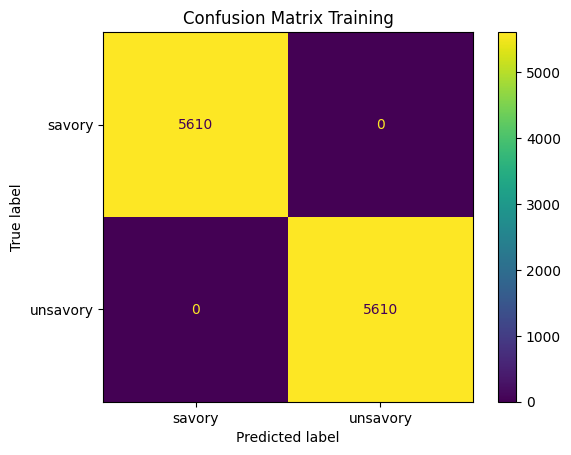

In [21]:
print(classification_report(labels, bovw.forest.predict(train_hist)))

ConfusionMatrixDisplay.from_estimator(bovw.forest, train_hist, labels)
plt.title("Confusion Matrix Training")
plt.show()

## Load after trainig for val phase

In [22]:
bovw = BOVW.load_model('./bovw/bovw.pkl')

Extracting SIFT from image ..\..\..\dataset\valid\unsavory\300.jpg...: 100%|██████████| 600/600 [00:08<00:00, 71.96it/s]


BOVW computed in: 0.7270814000003156
              precision    recall  f1-score   support

      savory       0.83      0.85      0.84       300
    unsavory       0.84      0.83      0.84       300

    accuracy                           0.84       600
   macro avg       0.84      0.84      0.84       600
weighted avg       0.84      0.84      0.84       600



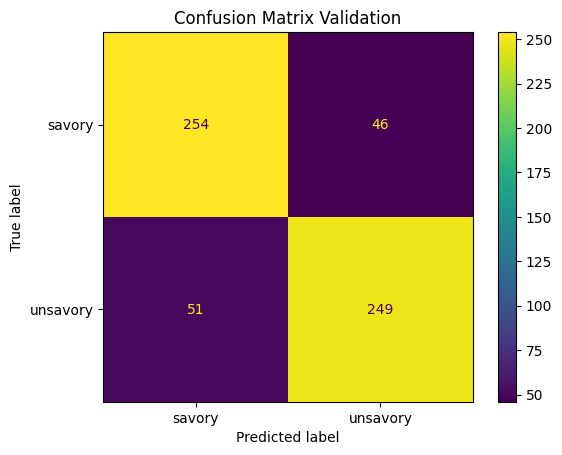

In [23]:
descr_val, labels_val, val_path = bovw.extract_Sifts(path_val, 'jpg')
histogram_val = bovw.compute_histogram(descr_val, labels_val)
predictions_val =  [i for i in bovw.model.predict(histogram_val)]

print(classification_report(labels_val, bovw.model.predict(histogram_val)))

ConfusionMatrixDisplay.from_estimator(bovw.model, histogram_val, labels_val)
plt.title("Confusion Matrix Validation")
plt.show()

c:\Users\Alessandro\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Alessandro\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eli

              precision    recall  f1-score   support

      savory       0.85      0.55      0.66       300
    unsavory       0.67      0.90      0.76       300

    accuracy                           0.72       600
   macro avg       0.76      0.72      0.71       600
weighted avg       0.76      0.72      0.71       600



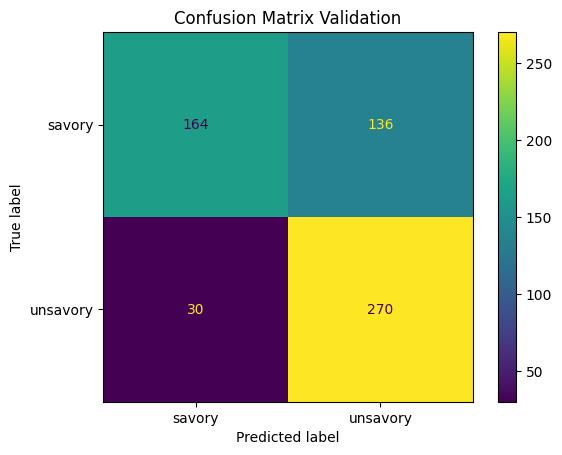

In [24]:
print(classification_report(labels_val, bovw.knn.predict(histogram_val)))

ConfusionMatrixDisplay.from_estimator(bovw.knn, histogram_val, labels_val)
plt.title("Confusion Matrix Validation")
plt.show()

              precision    recall  f1-score   support

      savory       0.83      0.83      0.83       300
    unsavory       0.83      0.83      0.83       300

    accuracy                           0.83       600
   macro avg       0.83      0.83      0.83       600
weighted avg       0.83      0.83      0.83       600



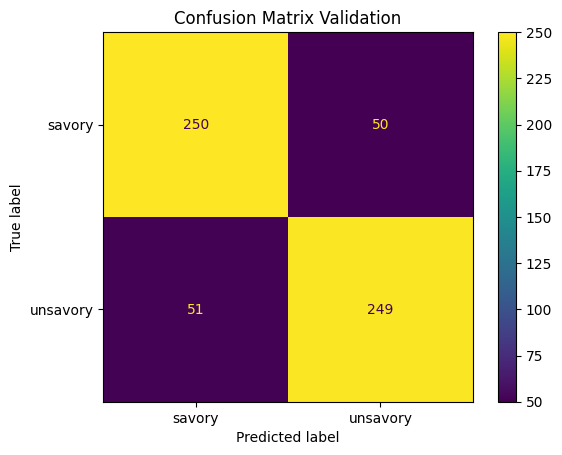

In [25]:
print(classification_report(labels_val, bovw.forest.predict(histogram_val)))

ConfusionMatrixDisplay.from_estimator(bovw.forest, histogram_val, labels_val)
plt.title("Confusion Matrix Validation")
plt.show()

## Load after training for test phase

In [26]:
bovw = BOVW.load_model('./bovw/bovw.pkl')

Extracting SIFT from image ..\..\..\dataset\test\unsavory\300.jpg...: 100%|██████████| 600/600 [00:10<00:00, 54.68it/s]


BOVW computed in: 0.7371173000010458
              precision    recall  f1-score   support

      savory       0.95      0.87      0.91       300
    unsavory       0.88      0.95      0.92       300

    accuracy                           0.91       600
   macro avg       0.91      0.91      0.91       600
weighted avg       0.91      0.91      0.91       600



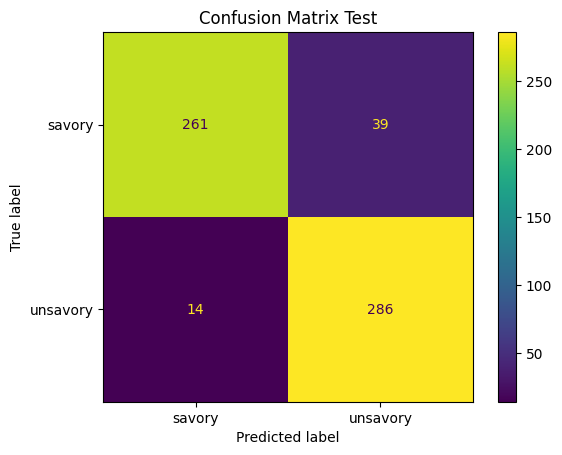

In [27]:
descr_test, labels_test, test_path = bovw.extract_Sifts(path_test, 'jpg')
histogram_test = bovw.compute_histogram(descr_test, labels_test)
predictions =  [i for i in bovw.model.predict(histogram_test)]

print(classification_report(labels_test, bovw.model.predict(histogram_test)))

ConfusionMatrixDisplay.from_estimator(bovw.model, histogram_test, labels_test)
plt.title("Confusion Matrix Test")
plt.show()

c:\Users\Alessandro\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Alessandro\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eli

              precision    recall  f1-score   support

      savory       0.93      0.64      0.76       300
    unsavory       0.73      0.95      0.82       300

    accuracy                           0.80       600
   macro avg       0.83      0.80      0.79       600
weighted avg       0.83      0.80      0.79       600



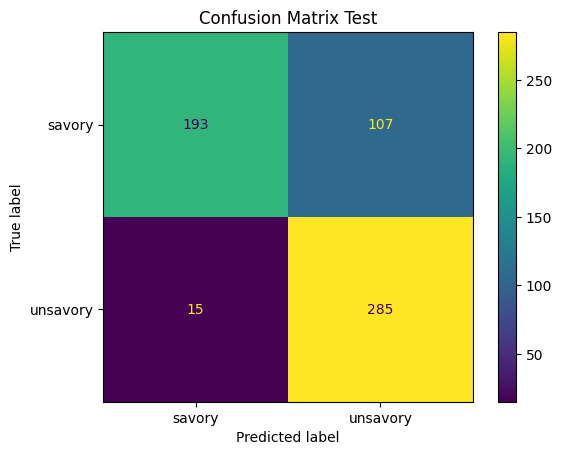

In [28]:
print(classification_report(labels_test, bovw.knn.predict(histogram_test)))

ConfusionMatrixDisplay.from_estimator(bovw.knn, histogram_test, labels_test)
plt.title("Confusion Matrix Test")
plt.show()

              precision    recall  f1-score   support

      savory       0.90      0.86      0.88       300
    unsavory       0.87      0.90      0.88       300

    accuracy                           0.88       600
   macro avg       0.88      0.88      0.88       600
weighted avg       0.88      0.88      0.88       600



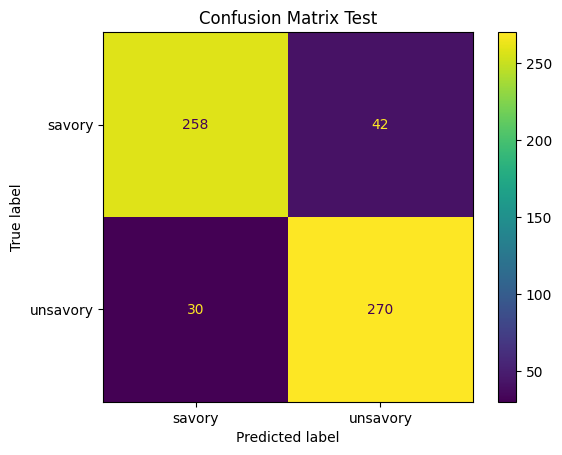

In [29]:
print(classification_report(labels_test, bovw.forest.predict(histogram_test)))

ConfusionMatrixDisplay.from_estimator(bovw.forest, histogram_test, labels_test)
plt.title("Confusion Matrix Test")
plt.show()

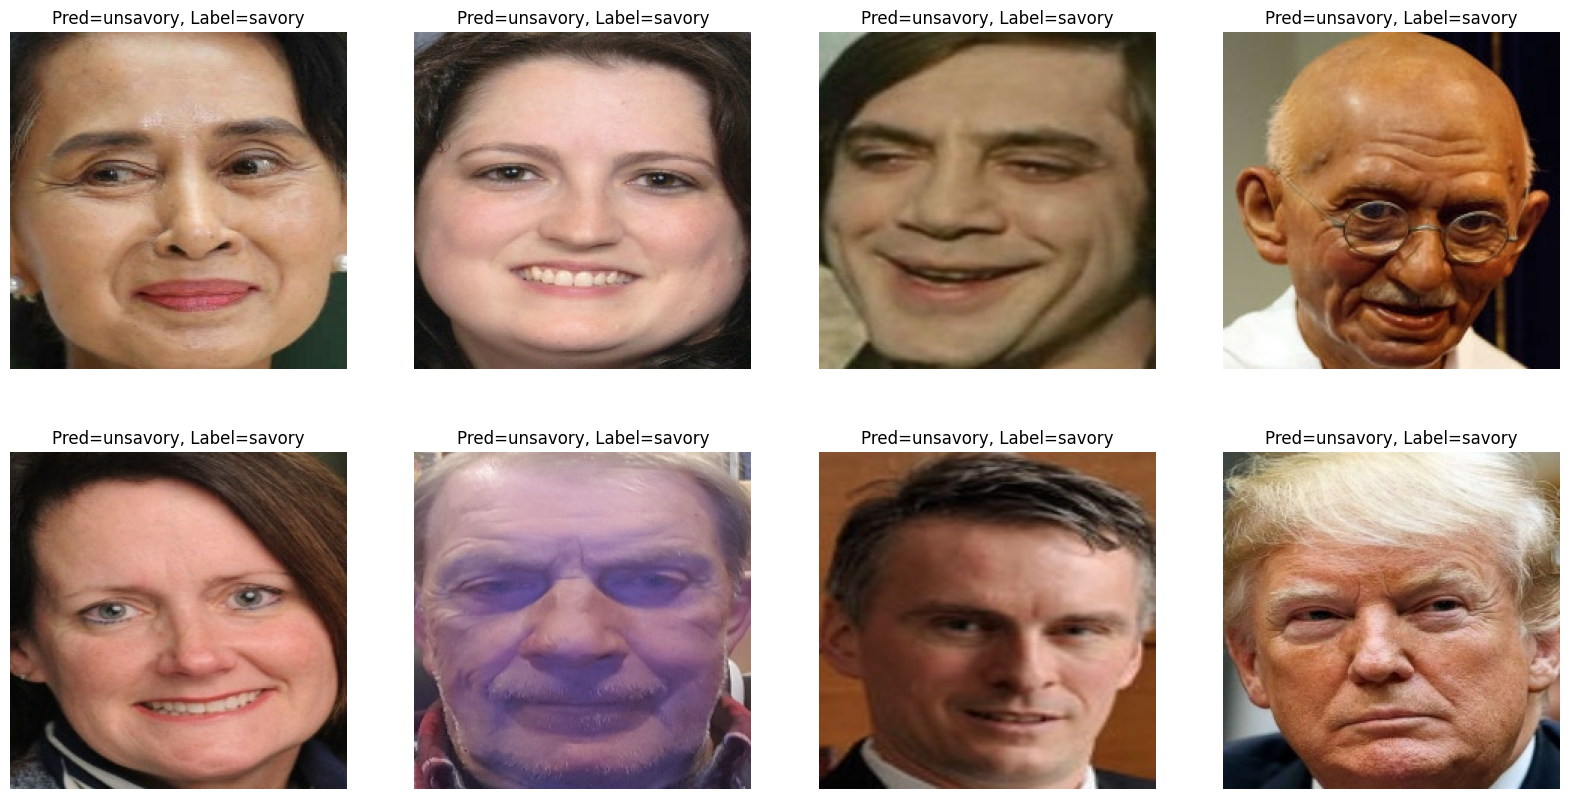

In [32]:
BOVW.show_results(bovw.model, histogram_test, labels_test, test_images_path, show_positive=False)

## CBIR from 0

In [18]:
for p in test_images_path:
    pred, k_similar = BOVW.cbir('./bovw/bovw.pkl', p, './bovw/train_bovw.pkl', './bovw/train_paths.pkl')
    print(pred)
    print(k_similar)
    break

BOVW computed in: 0.0013032999995630234
KDTree computed in: 0.1659884000000602
10 most similar found in: 0.0016395999991800636
['savory']
['..\\dataset\\train\\savory\\3952.jpg', '..\\dataset\\train\\unsavory\\4164.jpg', '..\\dataset\\train\\savory\\2596.jpg', '..\\dataset\\train\\unsavory\\1181.jpg', '..\\dataset\\train\\unsavory\\5263.jpg', '..\\dataset\\train\\unsavory\\3368.jpg', '..\\dataset\\train\\unsavory\\3015.jpg', '..\\dataset\\train\\unsavory\\1760.jpg', '..\\dataset\\train\\savory\\5340.jpg', '..\\dataset\\train\\unsavory\\2566.jpg']
